# 거시경제지표 통합
- 2020.08.28 작업본  

(상세 기술 추가 예정) 


In [1]:
# Import data handling Packages
import pandas as pd
import glob
import re

In [2]:
# Set Data directory
data_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/'
save_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/datasets/'


In [3]:
# 세부 경로
lv_dir = '거시경제_및_일반지표/01.거시경제지표/'
file_list = glob.glob(data_dir+lv_dir+ '*.xlsx')
file_list

['C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\CD(91일물).xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\GDP.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\가계대출.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\건설기성액.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\건설투자.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\경제성장률.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\국고채(3년).xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\민간소비.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\설비투자.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\정기예금금리.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\종합주가지수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/거시경제_및_일반지표/01.거시경제지표\\주택담보대출금리.xlsx',


##### 통합 누락 테이블 : 
" GDP: _필드 값 없음_  
" 가계대출, 주택대출 : _광역시도 구분으로 두개는 따로 join_ 

In [4]:
# import raw data

macro1_df = pd.read_excel(data_dir+lv_dir+'CD(91일물).xlsx', sheet_name=0, header=10, index_col=0).T
macro2_df = pd.read_excel(data_dir+lv_dir+'GDP.xlsx', sheet_name=0, header=10, index_col=0).T
macro3_df = pd.read_excel(data_dir+lv_dir+'가계대출.xlsx', sheet_name=0, header=10, index_col=0).T
macro4_df = pd.read_excel(data_dir+lv_dir+'건설기성액.xlsx', sheet_name=0, header=10, index_col=0).T
macro5_df = pd.read_excel(data_dir+lv_dir+'건설투자.xlsx', sheet_name=0, header=10, index_col=0).T
macro6_df = pd.read_excel(data_dir+lv_dir+'경제성장률.xlsx', sheet_name=0, header=10, index_col=0).T
macro7_df = pd.read_excel(data_dir+lv_dir+'국고채(3년).xlsx', sheet_name=0, header=10, index_col=0).T
macro8_df = pd.read_excel(data_dir+lv_dir+'민간소비.xlsx', sheet_name=0, header=10, index_col=0).T
macro9_df = pd.read_excel(data_dir+lv_dir+'설비투자.xlsx', sheet_name=0, header=10, index_col=0).T
macro10_df = pd.read_excel(data_dir+lv_dir+'정기예금금리.xlsx', sheet_name=0, header=10, index_col=0).T
macro11_df = pd.read_excel(data_dir+lv_dir+'종합주가지수.xlsx', sheet_name=0, header=10, index_col=0).T
macro12_df = pd.read_excel(data_dir+lv_dir+'주택담보대출금리.xlsx', sheet_name=0, header=10, index_col=0).T
macro13_df = pd.read_excel(data_dir+lv_dir+'주택대출.xlsx', sheet_name=0, header=10, index_col=0).T
macro14_df = pd.read_excel(data_dir+lv_dir+'환율.xlsx', sheet_name=0, header=10, index_col=0).T

In [5]:
# 지수주기 별 
# 기준년월 단위
print(macro1_df.head()) # CD금리
print(macro4_df.head()) # 건설기성액
print(macro7_df.head()) # 국고채금리
print(macro10_df.head()) # 정기예금금리
print(macro11_df.head()) # 종합주가지수
print(macro12_df.head()) # 주택담보대출금리
print(macro14_df.head()) #환율
# 기준분기 단위
print(macro5_df.head()) # 건설투자 
print(macro6_df.head()) # 경제성장률
print(macro8_df.head()) # 민간소비 
print(macro9_df.head()) # 설비투자
# 기준년월 단위 + 광역 시도
print(macro3_df.head()) # 가계대출 
print(macro13_df.head()) # 주택대출 


지 역           전국
1991년 03월  17.60
1991년 04월  18.65
1991년 05월  19.01
1991년 06월  19.02
1991년 07월  18.30
지 역             전국
1997년 07월  4407803
1997년 08월  4706981
1997년 09월  4936866
1997년 10월  5205676
1997년 11월  5203394
지 역           전국
1995년 05월  14.81
1995년 06월  14.58
1995년 07월  14.09
1995년 08월  13.13
1995년 09월  12.82
지 역          전국
1996년 01월  9.12
1996년 02월  8.38
1996년 03월  9.49
1996년 04월  9.79
1996년 05월  8.86
지 역           전국
1981년 01월  103.1
1981년 02월  104.4
1981년 03월  105.0
1981년 04월  112.3
1981년 05월  121.8
지 역          전국
2001년 09월  6.26
2001년 10월  6.79
2001년 11월  6.03
2001년 12월  6.15
2002년 01월  6.00
지 역           전국
1964년 05월  255.8
1964년 06월  255.8
1964년 07월  255.8
1964년 08월  255.8
1964년 09월  255.8
지 역           전국
1960년 02분기   3.5
1960년 03분기 -16.7
1960년 04분기 -10.0
1961년 01분기  24.5
1961년 02분기   1.7
지 역          전국
1960년 02분기  4.5
1960년 03분기 -1.1
1960년 04분기  0.6
1961년 01분기  3.2
1961년 02분기  4.3
지 역          전국
1960년 02분기  5.4
1960년 03분기 -4.0
1960년 04분기  3.9
1961년 01분기  0.9
1961년 02

In [6]:
# 지수주기 별 
# 기준년월 단위
macro1_df.rename(columns={'전국': 'CD'}, inplace=True) # CD금리
macro4_df.rename(columns={'전국': '건설기성액'}, inplace=True) # 건설기성액
macro7_df.rename(columns={'전국': '국고채'}, inplace=True) # 국고채금리
macro10_df.rename(columns={'전국': '정기예금금리'}, inplace=True) # 정기예금금리
macro11_df.rename(columns={'전국': '종합주가지수'}, inplace=True) # 종합주가지수
macro12_df.rename(columns={'전국': '주택담보대출금리'}, inplace=True) # 주택담보대출금리
macro14_df.rename(columns={'전국': '환율'}, inplace=True) #환율
# 기준분기 단위 
macro5_df.rename(columns={'전국': '건설투자'}, inplace=True) # 건설투자 
macro6_df.rename(columns={'전국': '경제성장률'}, inplace=True) # 경제성장률
macro8_df.rename(columns={'전국': '민간소비'}, inplace=True) # 민간소비 
macro9_df.rename(columns={'전국': '설비투자'}, inplace=True) # 설비투자


In [7]:
# 지수주기 별 
# 기준년월 단위
frames = [macro1_df,macro4_df,macro7_df,macro10_df,macro11_df,macro12_df,macro14_df]
macro_months_df = pd.concat(frames, axis=1) 

# 기준분기 단위 
frames = [macro5_df, macro6_df, macro8_df, macro9_df]
macro_quarters_df = pd.concat(frames, axis=1) 


C:\Users\seoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


### * 1.1 거시경제지표_월주기지표

In [8]:
macro_months_df.columns.rename(None, inplace=True)
macro_months_df.index.rename('기준년월', inplace=True)
macro_months_df.reset_index(inplace=True)

macro_months_df.tail(10)

,기준년월,CD,건설기성액,국고채,정기예금금리,종합주가지수,주택담보대출금리,환율
665,2019년 10월,1.46,10864051.0,1.36,1.54,2065.75,2.50,1168.4
666,2019년 11월,1.52,10982070.0,1.49,1.62,2128.79,2.45,1179.3
667,2019년 12월,1.53,14296790.0,1.39,1.59,2147.01,2.45,1157.8
668,2020년 01월,1.47,9457972.0,1.37,1.53,2203.44,2.51,1183.5
669,2020년 02월,1.42,9580546.0,1.25,1.41,2167.12,2.52,1215.9
670,2020년 03월,1.23,11878865.0,1.09,1.26,1786.75,2.48,1222.6
671,2020년 04월,1.10,10750798.0,1.02,1.22,1849.59,2.58,1225.2
672,2020년 05월,1.02,10701576.0,0.88,1.07,1965.17,2.52,1239.4
673,2020년 06월,0.79,12523577.0,0.85,0.88,2134.70,2.49,1200.7
674,2020년 07월,0.79,NaN,0.83,NaN,NaN,NaN,1191.4


### * 1.2 거시경제지표_분기주기지표

In [9]:
macro_quarters_df.columns.rename(None, inplace=True)
macro_quarters_df.index.rename('기준분기', inplace=True)
macro_quarters_df.reset_index(inplace=True)

macro_quarters_df.tail(10)

,기준분기,건설투자,경제성장률,민간소비,설비투자
231,2018년 01분기,1.3,1.1,1.3,4.7
232,2018년 02분기,-2.7,0.6,0.3,-8.9
233,2018년 03분기,-6.9,0.6,0.5,-3.3
234,2018년 04분기,2.3,0.9,0.5,2.4
235,2019년 01분기,-0.7,-0.3,0.1,-8.5
236,2019년 02분기,2.9,1.0,0.7,2.6
237,2019년 03분기,-6.4,0.4,0.4,1.7
238,2019년 04분기,8.0,1.3,0.7,2.6
239,2020년 01분기,0.5,-1.3,-6.5,0.2
240,2020년 02분기,-1.3,-3.3,1.4,-2.9


### * 1.3 거시경제지표_월주기+광역시도구분지표
: ['전국', '서울'] 속성 선택적 추출

In [10]:
# 전국추세, 서울 집계에 대해서만 추출 
common_cols313 = ['전국','서울'] # : 세대수, 인구수 df 에서 추출

macro3_part_df = macro3_df[common_cols313]
macro13_part_df = macro13_df[common_cols313]


In [11]:
# 컬럼 index name 누락
macro3_part_df.columns.rename(None,inplace=True)
macro13_part_df.columns.rename(None,inplace=True)

# index Name 지정
macro3_part_df.index.rename('기준년월', inplace=True)
macro13_part_df.index.rename('기준년월', inplace=True)

# df별 공통속성명 중복방지(prefix 추가)
macro3_part_df = macro3_part_df.add_prefix('가계대출_')
macro13_part_df = macro13_part_df.add_prefix('주택대출_')


In [12]:
# 지수주기 별 통합
# 기준년월도 단위
frames = [macro3_part_df, macro13_part_df]
macro_months_provs_df = pd.concat(frames, axis=1).reset_index()

In [13]:
macro_months_provs_df.tail(10)

,기준년월,가계대출_전국,가계대출_서울,주택대출_전국,주택대출_서울
140,2019년 08월,1.06242e+06,314138,622184,189603
141,2019년 09월,1.06647e+06,315820,625423,190098
142,2019년 10월,1.0745e+06,318900,629656,192232
143,2019년 11월,1.08037e+06,321228,633098,193327
144,2019년 12월,1.08398e+06,323097,633745,194202
145,2020년 01월,1.08351e+06,323867,634283,195176
146,2020년 02월,1.08643e+06,326253,635283,196655
147,2020년 03월,1.09453e+06,330398,639598,198288
148,2020년 04월,1.09952e+06,332222,644393,200025
149,2020년 05월,1.10306e+06,334236,646587,201328


In [15]:
# export Dataframe
macro_months_df.to_csv(save_dir+'01.거시경제지표_월주기지표.csv', encoding='euc-kr', index=False)
macro_quarters_df.to_csv(save_dir+'01.거시경제지표_분기주기지표.csv', encoding='euc-kr', index=False)
macro_months_provs_df.to_csv(save_dir+'01.거시경제지표_월주기+광역시도지표.csv', encoding='euc-kr', index=False)

## * Visualization

In [16]:
import seaborn as sns

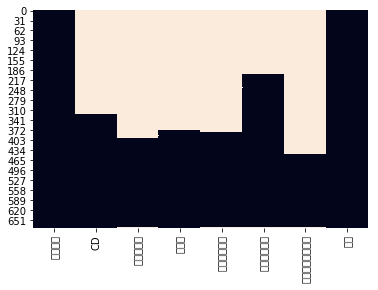

In [17]:
sns.heatmap(macro_months_df.isna(), cbar=False)

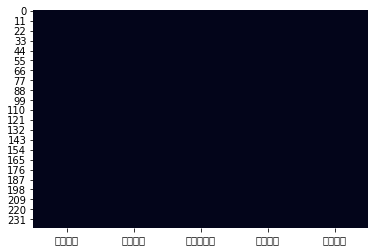

In [18]:
sns.heatmap(macro_quarters_df.isna(), cbar=False)

In [19]:
macro_quarters_df.head()

,기준분기,건설투자,경제성장률,민간소비,설비투자
0,1960년 02분기,3.5,4.5,5.4,15.6
1,1960년 03분기,-16.7,-1.1,-4.0,-14.0
2,1960년 04분기,-10.0,0.6,3.9,2.2
3,1961년 01분기,24.5,3.2,0.9,0.6
4,1961년 02분기,1.7,4.3,-1.0,4.8


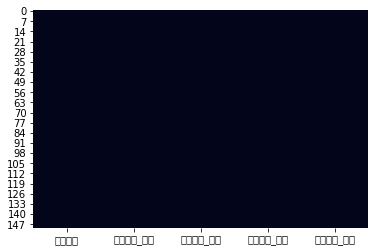

In [20]:
sns.heatmap(macro_months_provs_df.isna(), cbar=False)

In [21]:
macro_months_provs_df.head()

,기준년월,가계대출_전국,가계대출_서울,주택대출_전국,주택대출_서울
0,2007년 12월,474094,163373,291083,107469
1,2008년 01월,473607,163224,291623,107434
2,2008년 02월,476919,164072,290639,106294
3,2008년 03월,480415,165193,291618,106394
4,2008년 04월,485303,166905,294082,107235
